In [2]:
from HardDisks import HardDisks
import numpy as np
import matplotlib.pyplot as plt

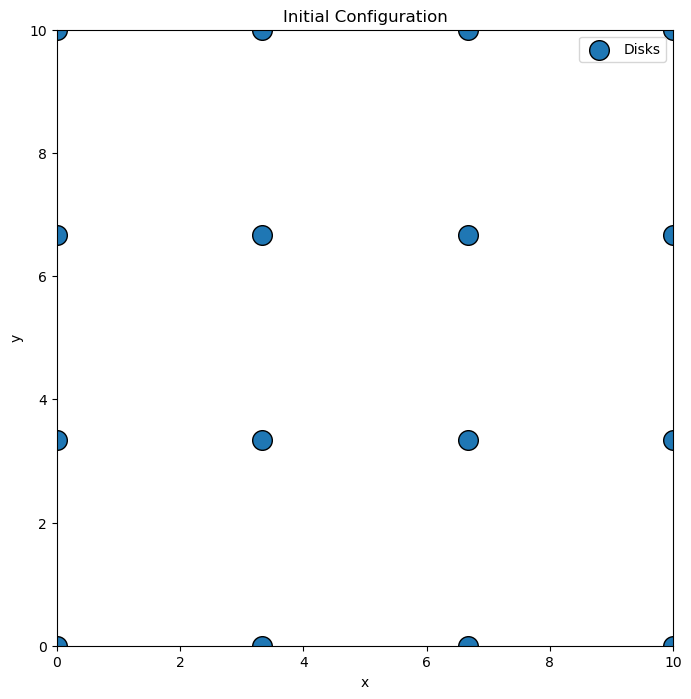

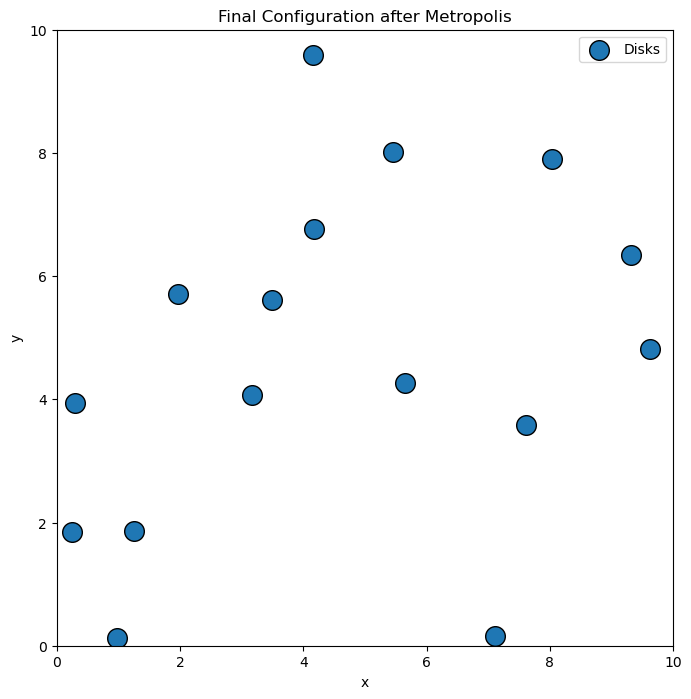

In [3]:
# Parameters
N = 16           # Number of disks
q = 1.0          # Step size
L = 10.0         # Box size
sigma = 0.5      # Disk radius
steps = 1000     # Number of Metropolis steps

# Create the HardDisks system
system = HardDisks(N, q, L, sigma, initial_conf='rectangular')

# Plot initial configuration
system.plot(title="Initial Configuration")

# Simulate the system
system.simulate(steps)

# Plot final configuration
system.plot(title="Final Configuration after Metropolis")


ValueError: For 'rectangular' configuration, N must be a perfect square.

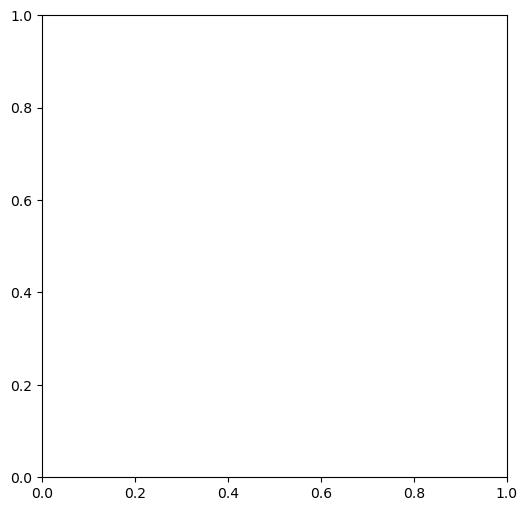

In [6]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

N = np.asarray([4,9, 16, ]) # fifty possible 
q = np.linspace(0.2, 10, 20)
steps = 1000

acceptance_rate = np.zeros((len(N), len(q)))
eta = np.zeros(len(N))

for i in range(len(N)):
    for j in range(len(q)):
        system = HardDisks(N[i], q[j], 100, 2, initial_conf='rectangular')
        rate = system.get_avg_acceptance(steps)
        acceptance_rate[i,j] = rate
        eta[i] = system.get_packing()

ax.set_title('Contour plot of Acceptance Rate')
ax.pcolormesh(eta, q, acceptance_rate, shading='gouraud', cmap=plt.cm.BuGn_r)
ax.contour(eta, q, acceptance_rate )